# Superstore Data Analysis

This notebook analyzes the Superstore dataset to identify trends and insights in sales data.

## Data Loading and Preparation

In [13]:
import pandas as pd

try:
    df = pd.read_csv('Sample - Superstore 3.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('Sample - Superstore 3.csv', encoding='latin-1')

display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Month'] = df['Order Date'].dt.to_period('M')

df.dropna(subset=['Sales', 'Order Date'], inplace=True)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


## Sales Trend Analysis

Analyzing the monthly sales trend to identify seasonality and growth patterns.

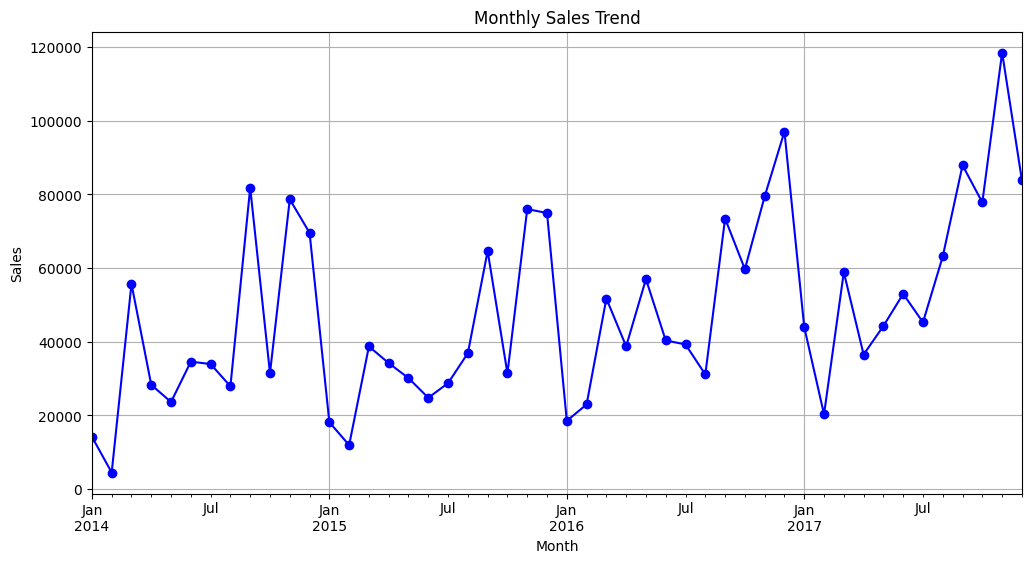

In [15]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## Top Selling Products

Identifying the top 10 products by sales.

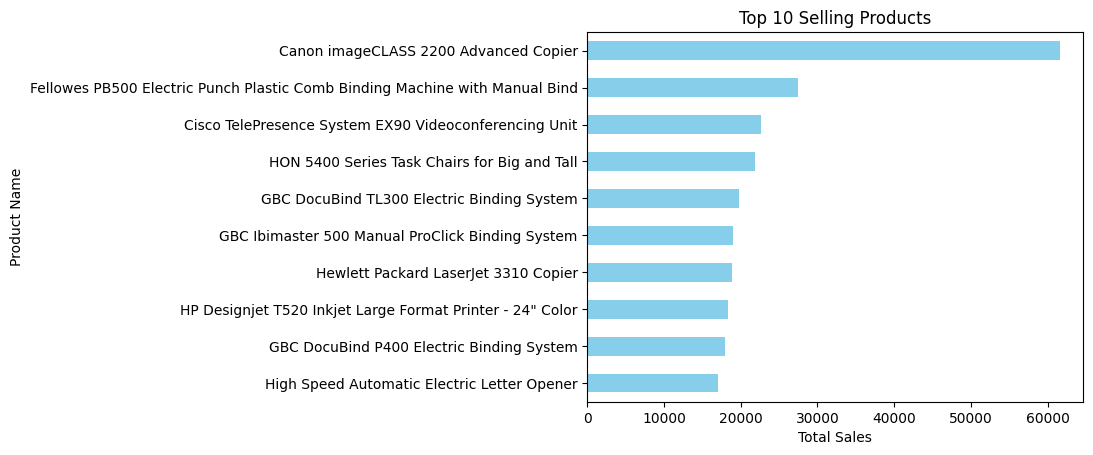

In [16]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)

top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()

## Sales by Region

Analyzing sales performance across different regions.

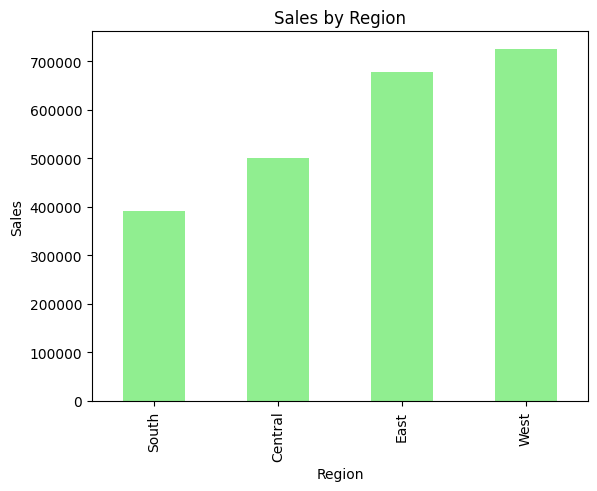

In [17]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

region_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()

## Sales Distribution by Category

Examining the distribution of sales within different product categories.

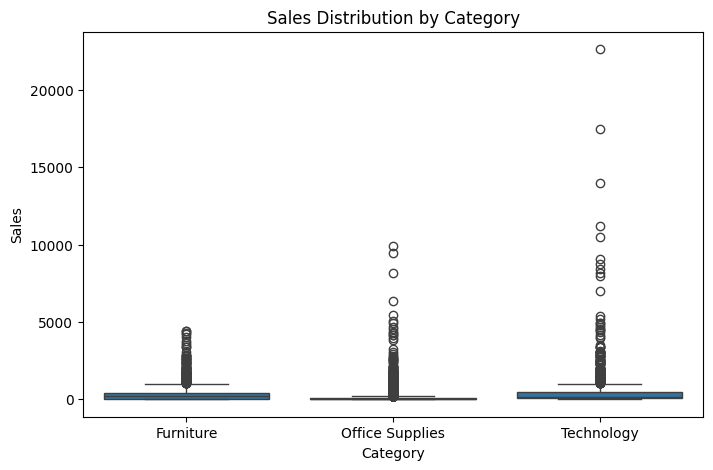

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title('Sales Distribution by Category')
plt.show()

## Top Customers

Identifying the top 5 customers by sales.

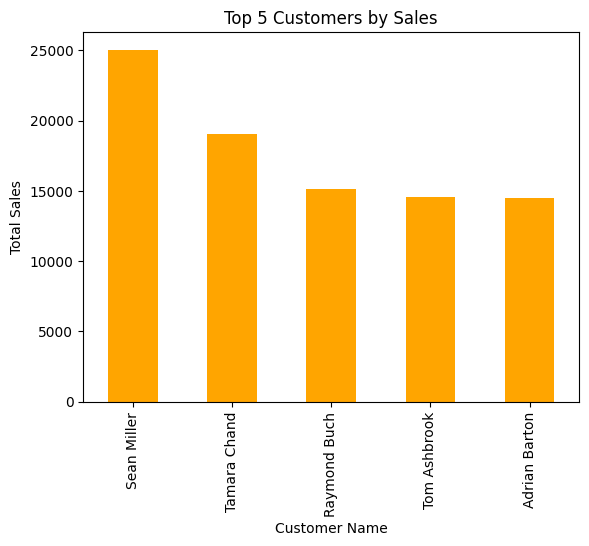

In [19]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(5)

top_customers.plot(kind='bar', color='orange')
plt.title('Top 5 Customers by Sales')
plt.ylabel('Total Sales')
plt.show()

## Insights from the Superstore Data Analysis

Based on the analysis and visualizations performed, here are some key insights:

* **Monthly Sales Trend:** The monthly sales trend shows a clear seasonality, with peaks typically occurring towards the end of the year (November and December). There appears to be consistent growth over the years, although there are fluctuations month-to-month.

* **Top 10 Selling Products:** The analysis of top-selling products highlights that high-value items like copiers and binding machines contribute significantly to overall sales.

* **Sales by Region:** The West and East regions have the highest sales figures, while the South and Central regions have lower sales. This suggests potential areas for targeted marketing or sales efforts in the less performing regions.

* **Sales Distribution by Category:** The box plot of sales distribution by category indicates that 'Technology' products generally have a higher sales range and potentially more outliers (high-value sales) compared to 'Furniture' and 'Office Supplies'. This aligns with the observation about top-selling products being high-value technology items.

* **Top 5 Customers by Sales:** The top 5 customers represent a significant portion of the total sales, indicating the importance of maintaining strong relationships with these high-value customers.